### 조건부엔트로피
- 확률변수 X가 다른 확률변수 Y의 값을 예측하는데 도움이 되는지를 측정하는 방법 중의 하나다.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy as sp

### 예측에 도움이 되는 경우
- p(y = 0 | x = 0) = 1, p(y = 1 | x = 0) = 0
- p(y = 0 | x = 1) = 0, p(y = 1 | x = 1) = 1

C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backe

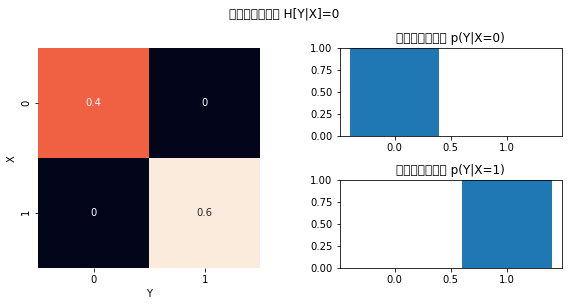

In [4]:
plt.figure(figsize=(8, 4))
ax1 = plt.subplot(121)
pXY = [[0.4, 0], [0, 0.6]]
sns.heatmap(pXY, annot=True, cbar=False)
plt.xlabel("Y")
plt.ylabel("X")

plt.subplot(222)
plt.bar([0, 1], [1, 0])
plt.ylim(0, 1)
plt.title("조건부확률분포 p(Y|X=0)")

plt.subplot(224)
plt.bar([0, 1], [0, 1])
plt.ylim(0, 1)
plt.title("조건부확률분포 p(Y|X=1)")

plt.tight_layout(w_pad=5)
plt.suptitle("조건부엔트로피 H[Y|X]=0", y=1.05)
plt.show()

### 예측에 도움이 되지 않는 경우
- p(y = 0 | x = 0) = 1/3, p(y = 1 | x = 0) = 2/3
- p(y = 0 | x = 1) = 1/3, p(y = 1 | x = 1) = 2/3

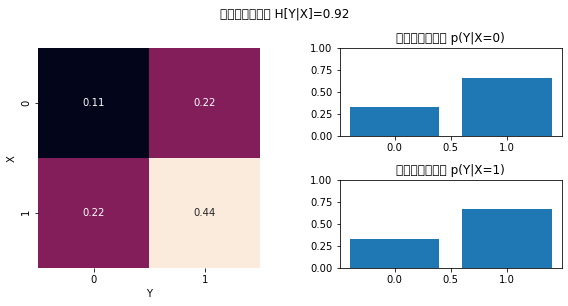

In [7]:
plt.figure(figsize=(8, 4))
ax1 = plt.subplot(121)
pXY = [[1/9, 2/9], [2/9, 4/9]]
sns.heatmap(pXY, annot=True, cbar=False)
plt.xlabel("Y")
plt.ylabel("X")

plt.subplot(222)
plt.bar([0, 1], [1/3, 2/3])
plt.ylim(0, 1)
plt.title("조건부확률분포 p(Y|X=0)")

plt.subplot(224)
plt.bar([0, 1], [1/3, 2/3])
plt.ylim(0, 1)
plt.title("조건부확률분포 p(Y|X=1)")

plt.tight_layout(w_pad=5)
plt.suptitle("조건부엔트로피 H[Y|X]=0.92", y=1.05)
plt.show()

### 조건부엔트로피를 사용한 붓꽃 분류문제

In [10]:
from sklearn.datasets import load_iris

iris = load_iris()
idx = np.in1d(iris.target, [1, 2])
X = iris.data[idx, :]
y = iris.target[idx]
df = pd.DataFrame(X, columns=iris.feature_names)
df["species"] = iris.target[idx]
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
95,6.7,3.0,5.2,2.3,2
96,6.3,2.5,5.0,1.9,2
97,6.5,3.0,5.2,2.0,2
98,6.2,3.4,5.4,2.3,2
99,5.9,3.0,5.1,1.8,2


C:\Users\user\.conda\envs\test_envs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\.conda\envs\test_envs\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\user\.conda\envs\test_envs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\.conda\en

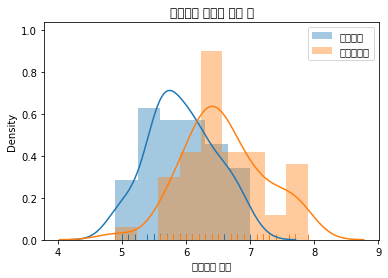

In [11]:
sns.distplot(df[df.species == 1]["sepal length (cm)"], hist=True, rug=True, label="버지니카")
sns.distplot(df[df.species == 2]["sepal length (cm)"], hist=True, rug=True, label="베르시칼라")
plt.legend()
plt.xlabel("꽃받침의 길이")
plt.title("꽃받침의 길이와 붓꽃 종")
plt.show()

In [12]:
# 기준 : 6
df["X1"] = df["sepal length (cm)"] > 6
pivot_table1 = df.groupby(["X1", "species"]).size().unstack().fillna(0)
pivot_table1

species,1,2
X1,,
False,30,9
True,20,41


In [16]:
def cond_entropy(v):
    pYX0 = v[0, :] / np.sum(v[0, :])
    pYX1 = v[1, :] / np.sum(v[1, :])
    HYX0 = sp.stats.entropy(pYX0, base=2)
    HYX1 = sp.stats.entropy(pYX1, base=2)
    HYX = np.sum(v, axis=1) @ [HYX0, HYX1] / np.sum(v)
    return HYX

cond_entropy(pivot_table1.values)

0.860714271586387

In [17]:
# 기준 : 6.5
df["X2"] = df["sepal length (cm)"] > 6.5
pivot_table2 = df.groupby(["X2", "species"]).size().unstack()
pivot_table2

species,1,2
X2,,
False,42,28
True,8,22


In [19]:
cond_entropy(pivot_table2.values) # 따라서 6cm를 기준으로 잡는 것이 6.5cm보다는 낫다

0.9306576387006182